Name:  Irem Begüm Gündüz
MatrikelNummer:  7026821
   
Name:  Deborah Dormah Kanubala
MatrikelNummer:  7025906

Name: Anh Tuan Tran
MatrikelNummer: 7015463


# 3.3 Model Capacity, Underfitting and Overfitting (2.5 points)
Given training dataset $D = \{x_i,y_i\}_{i=1}^n$ where $x_i \in \mathbb{R}^d, y_i \in \mathbb{R}$ the ordinary linear least square regression minimizes the cost function
$f(x,y;w) = \frac{1}{n} \sum_{i=1}^n (y_i - \langle w, x_i \rangle - b )^2$
But sometimes this leads to overfitting or ill posed problems hence we add a regularizational term to the objective function. This is called ridge regression.
$f(x,y;w) = \frac{1}{n} \sum_{i=1}^n (y_i - \langle w, x_i \rangle - b )^2 + \lambda \sum_{i=1}^d w_i^2$
In practice we artificially add another dimension of 1's to $X$ to absorb the offset term b such that the objective function in matrix vector form becomes
$f(x,y;w) = \frac{1}{n} \Vert Y - Xw \Vert^2 + \lambda \Vert w \Vert^2 $ where
    $
        X = \begin{bmatrix}
    X_{1,1} & \cdots & X_{1,d} & 1\\
    X_{2,1}  & \cdots & X_{2,d} & 1 \\
    \vdots & \vdots & \vdots & \vdots \\
    X_{n,1} & \cdots & X_{n,d} & 1
    \end{bmatrix}
    $
 and $w = \begin{bmatrix}w_1 & w_2 & ... & w_d & b \end{bmatrix}^T$.

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib.cm as cm
np.random.seed(42)

## 3.3a (0.5 + 0.5 point)
Implement the fit() function in the ridge_regression class which takes three parameters X, Y and LAMBDA. The fit() function computes the minimizer $w^*$ as derived in 3.2 for the regularized mean squared error objective function. Store the value of $w^*$ in self.w
Implement the predict() function that takes a matrix X and returns the predictions of the model on X and since the bias term is absorbed in $w$, please do not forget to add another dimension of 1's to X as described earlier in both the fit() and predict() functions. Assume that fit() is called before using predict(). 
**Use only basic matrix vector operations from numpy**

In [ ]:
class ridge_regression:
    def __init__(self):
        self.w = None # self.w.shape = (d+1,)
    
    def fit(self, X, Y, LAMBDA = 0.1): 
        """
        args: X.shape = (n, d). We account for the bias parameter b in the 
                design matrix X by artificially adding another dimension
                Y.shape = (n, 1)
        returns: weights
        Note that you have to artificially add a dimension of 1 as defined earlier to account for the bias term
        """
        n = X.shape[0]
        w = np.linalg.inv(X.T.dot(X) + LAMBDA * np.identity(X.shape[1])).dot(X.T.dot(Y))
        self.w  = np.append(w, np.ones([w.shape[0],1]))
        return  np.append(w,1)
    def predict(self, X):
        """
        Note that you have to artificially add a dimension of 1 as defined earlier to account for the bias term
        """
        X = np.append(X, np.ones([X.shape[0],1]), axis=1)
        
        return X.dot(self.w) 

## 3.3b (0.5 + 0.5 point)
We create a sample regression dataset using scikit-learn make_regression  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression   
The dataset has 100 samples which is randomly split into 70 training samples and 30 test samples. In this exercise we assume $x_i \in \mathbb{R}^1$  
1. Use a scatter plot to visualize your training (X_train, y_train) and test data (X_test, y_test). Train your ridge regression model on the training data (X_train, y_train) and visualize the regression model for different regularisation coefficient values $\lambda$ = [0.001, 0.01, 0.1, 1, 10, 100, 1000] using a line graph in the same plot. You can do this by using np.linspace and the predict function of your classifier. Use appropriate legend labels. 
2. For different regularisation coefficient values $\lambda$ = [0.001, 0.01, 0.1, 1, 10, 100, 1000] find the mean squared error between the predicted values of test dataset X_test and true labels of the test set. Plot a graph with **log scaled** $\lambda$ values on X-axis and mean squared error on Y-axis. You may use sklearn.metrics.mean_squared_error()

How does changing the values of $\lambda$ affect the error of the model?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Create a dummy regression dataset with noise
X , y = make_regression(n_samples = 100, n_features = 1, noise = 10)
print(X.shape, y.shape)

# Split the dataset into 70 training samples and 30 test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Different regularization coefficient values
lambda_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Use the log scaled values of lambda for plotting
log_scale = [-3, -2, -1, 0, 1, 2, 3]

(100, 1) (100,)
(70, 1) (70,) (30, 1) (30,)


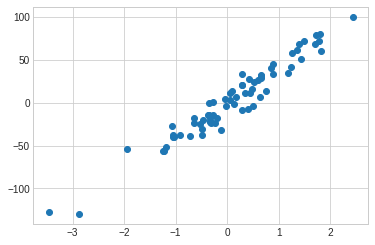

In [ ]:
plt.scatter(X_train,y_train)

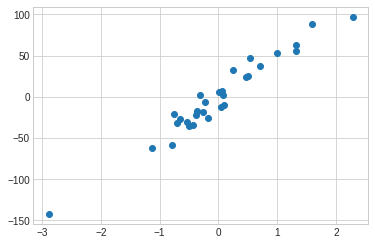

In [ ]:

plt.scatter(X_test,y_test)

In [ ]:
ridge = ridge_regression()
res = list()
restest = list()
for l in lambda_values:
#     print(X_train.shape)
    ridge.fit(X_train, y_train, LAMBDA=l)
    res.append(ridge.predict(X_train))
    restest.append(ridge.predict(X_test))
    #     print('res',res.shape)

Text(0.5, 1.0, 'Training Predictions')

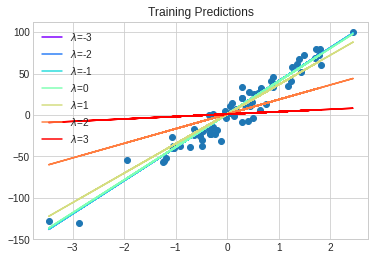

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, len(res)))
plt.scatter(X_train, y_train)
i = 0
for y_fit, col in zip(res,colors):
    plt.plot(X_train, y_fit, c=col, label=f'$\lambda$={log_scale[i]}')
    i += 1
plt.legend(loc="upper left")
plt.title("Training Predictions")

Text(0.5, 1.0, 'Test Predictions')

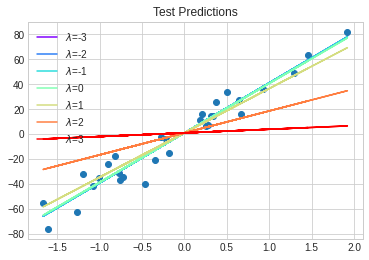

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, len(restest)))
plt.scatter(X_test, y_test)
i = 0
i = 0
for y_fit, col in zip(restest,colors):
    plt.plot(X_test, y_fit, c=col, label=f'$\lambda$={log_scale[i]}')
    i += 1
plt.legend(loc="upper left")
plt.title("Test Predictions")

Solution: Increasing lambda value cause increase in error of the model, as we see on both training and test plots.

## 3.3c (0.25 point)
We create a sample regression dataset using scikit-learn make_regression  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression   
The dataset has 100 training samples and in this exercise we will plot the weights of the model against different values of $\lambda$ = [0.001, 0.01, 0.1, 1, 10, 100, 1000]. For this exercise we take the training samples $x_i \in \mathbb{R}^{10}$ i.e. d = 10. Since the bias term is absorbed in the parameter $w = \begin{bmatrix}w_1 & w_2 & ... & w_d & b \end{bmatrix}^T$ the dimension of $w$ is $d+1$. Therefore we will only consider the first $d$ values (d=10) of self.w  
  
Train the ridge regression model on the training set (X_train, y_train) for different values of $\lambda$.
Plot a graph with **log scaled** lambda values on X-axis and each $w_i$ on the Y-axis on the same plot. Explain what happens to the weight values and model capacity as you increase the regularization coefficient.

In [ ]:
from sklearn.model_selection import train_test_split
X_train , y_train = make_regression(n_samples = 100, n_features = 10, noise = 10)
print(X_train.shape, y_train.shape)

(100, 10) (100,)


In [ ]:
ridge = ridge_regression()
weights = list()
for l in lambda_values:
    weights.append(ridge.fit(X_train, y_train, LAMBDA=l))

Text(0.5, 1.0, 'Weights vs Lambda values')

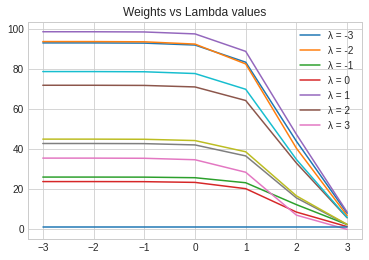

In [ ]:
plt.plot(log_scale, weights)
plt.legend(['λ = -3','λ = -2','λ = -1','λ = 0','λ = 1','λ = 2','λ = 3'])
plt.title("Weights vs Lambda values")

## 3.3d (0.25 point)
Answer the following questions  
1. Do you observe overfitting or underfitting for different values of λ in this exercise?

Solution: Yes, decrease in lambda values (considering the log version of lambdas) cause overfitting, as it pushes weights towards zero.